In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd
import mplsoccer


In [2]:
df  =pd.read_excel('E:/Docs/Data/England_Premier-League_2022-2023_Tottenham_vs_Manchester United.xlsx')

In [3]:
df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
3,0,6.0,a,38.6,93.2,carry,Successful,Jadon Sancho,34.4,93.3,NaN,-0.000717,25,AML,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2,NaN,a,74.4,36.0,OffsideGiven,Unsuccessful,Marcus Rashford,NaN,NaN,0.0,NaN,10,FW,Manchester United,England,Premier-League,2022-2023
1948,8,NaN,h,75.3,71.1,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1949,33,NaN,h,88.5,74.2,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1950,75,NaN,a,64.2,63.6,OffsideGiven,Unsuccessful,Anthony Martial,NaN,NaN,0.0,NaN,9,Sub,Manchester United,England,Premier-League,2022-2023


In [4]:
passes = df.loc[df['type'] == 'Pass']
passes

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
5,0,10.0,a,24.9,91.8,Pass,Successful,Diogo Dalot,33.2,67.6,0.0,0.002645,20,DL,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,93,45.0,a,83.4,13.5,Pass,Successful,Diogo Dalot,74.4,38.3,0.0,-0.006066,20,DL,Manchester United,England,Premier-League,2022-2023
1938,93,46.0,a,73.7,39.2,Pass,Successful,Fred,75.1,68.5,0.0,-0.000629,17,Sub,Manchester United,England,Premier-League,2022-2023
1940,93,47.0,a,79.1,77.8,Pass,Successful,Marcus Rashford,74.5,82.1,0.0,-0.002902,10,FW,Manchester United,England,Premier-League,2022-2023
1941,93,47.0,a,75.1,72.4,Pass,Successful,Luke Shaw,79.9,73.8,0.0,0.004408,23,DC,Manchester United,England,Premier-League,2022-2023


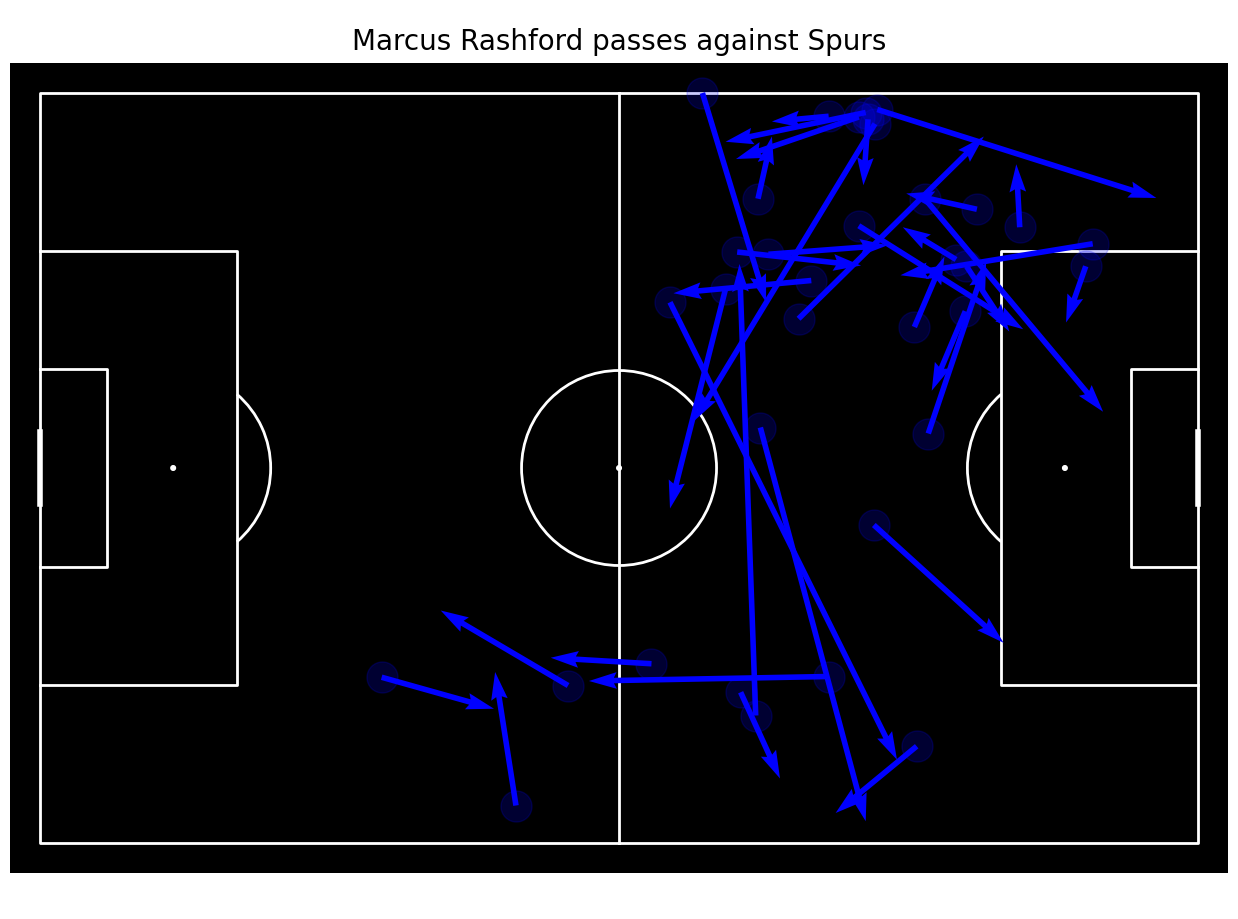

In [5]:
mask_bronze = (df.type == 'Pass') & (df.playerName == "Marcus Rashford")
df_pass = df.loc[mask_bronze, ['x', 'y', 'endX', 'endY']]

pitch = mplsoccer.Pitch(pitch_type= 'opta',pitch_color='black',line_color='White')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.endX, df_pass.endY, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Marcus Rashford passes against Spurs", fontsize = 20) 
plt.show()

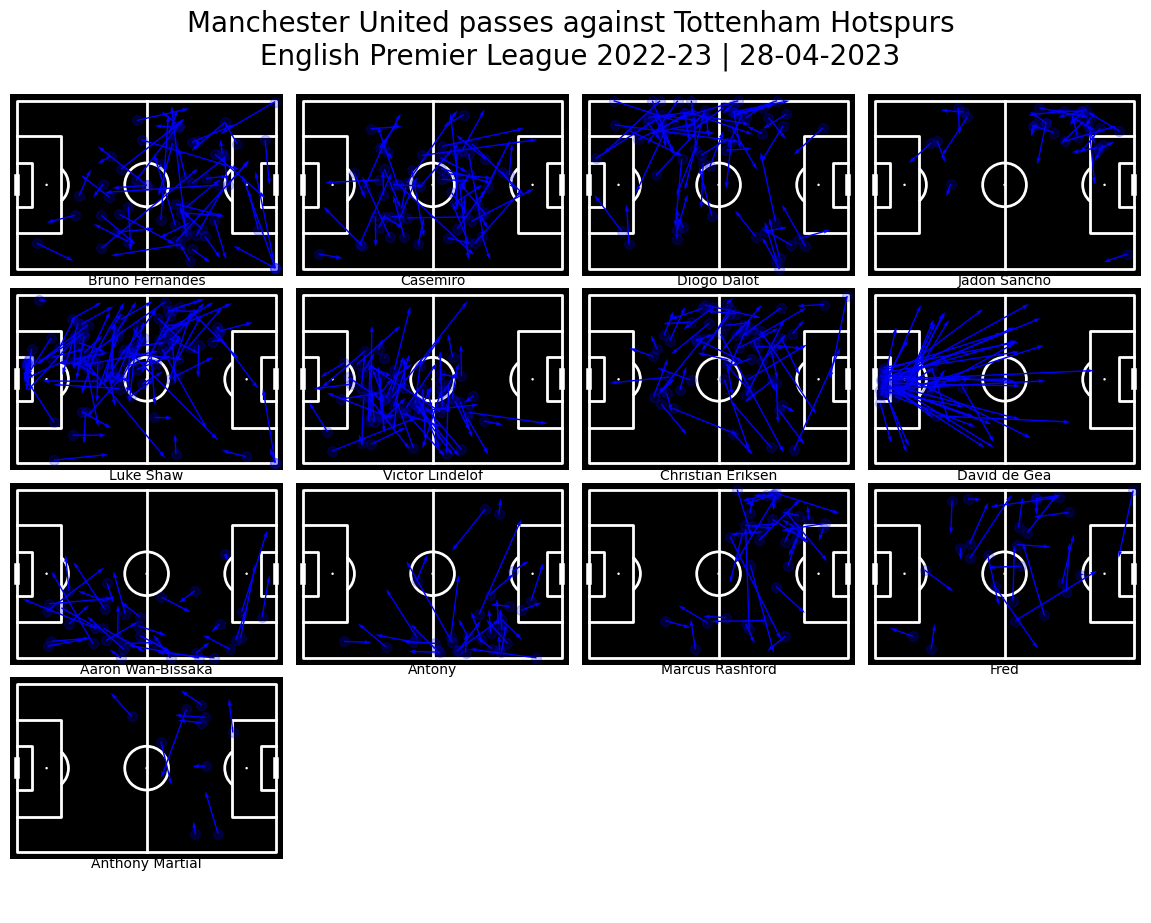

In [40]:
#prepare the dataframe of passes by England that were no-throw ins
mask_england = (df.type == 'Pass') & (df.team == "Manchester United")
df_passes = df.loc[mask_england, ['x', 'y', 'endX', 'endY', 'playerName']]
#get the list of all players who made a pass
names = df_passes['playerName'].unique()

#draw 4x4 pitches
pitch = mplsoccer.Pitch(pitch_type= 'opta',pitch_color='black',line_color='White')
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.05, title_space=0.03, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(50, -7, name,
            ha='center', va='center', fontsize=10)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["playerName"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.endX, player_df.endY, color = "blue", ax=ax, width=1)
    
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
    
#Another way to set title using mplsoccer 
axs['title'].text(0.5, 0.5, 'Manchester United passes against Tottenham Hotspurs \n English Premier League 2022-23 | 28-04-2023', ha='center', va='center', fontsize=20)
plt.show()